# Data Exploration

- Load Data
- Data Information
- Classifying catagorical and Numerican Datasets
- Univariate Analysis
    - Distribution of histograms for all features
- Correlations

# Load Data

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [7]:
# importing script modules from ../scripts
# Adding scripts path
import sys, os
sys.path.insert(0, '../scripts/')
from data_preProcessing import data_preProcessing_script
from data_manipulator import DataCleaner
from data_exploration import exploration

In [4]:
df = pd.read_csv("../data/processed_incl_missing.csv")
df.head()

,game_key,campaign_id,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,Serving Location(s),Black/white/audience list included?,Cost Centre,currency,Buy Rate (CPE),Volume Agreed,Gross Cost/Budget,Agency Fee,Percentage,Net Cost
0,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291,Thailand,www.wuxiaworld.com,...,Singapore,No black/white/audience list for this campaign,SGP,USD,0.28,242185.0,67811.8,0,15.0,57640.03
1,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298,Thailand,www.wuxiaworld.com,...,Singapore,No black/white/audience list for this campaign,SGP,USD,0.28,242185.0,67811.8,0,15.0,57640.03
2,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693,Thailand,www.prachachat.net,...,Singapore,No black/white/audience list for this campaign,SGP,USD,0.28,242185.0,67811.8,0,15.0,57640.03
3,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188,Thailand,www.prachachat.net,...,Singapore,No black/white/audience list for this campaign,SGP,USD,0.28,242185.0,67811.8,0,15.0,57640.03
4,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,0,0,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047,Thailand,www.prachachat.net,...,Singapore,No black/white/audience list for this campaign,SGP,USD,0.28,242185.0,67811.8,0,15.0,57640.03


# Data Information

In [4]:
preprocess = data_preProcessing_script(df)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99946 entries, 0 to 99945
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   game_key                             99946 non-null  object 
 1   campaign_id                          99946 non-null  object 
 2   type                                 99946 non-null  object 
 3   width                                99946 non-null  int64  
 4   height                               99944 non-null  object 
 5   creative_id                          99946 non-null  object 
 6   auction_id                           99946 non-null  object 
 7   browser_ts                           99946 non-null  object 
 8   geo_country                          99946 non-null  object 
 9   site_name                            99946 non-null  object 
 10  platform_os                          99946 non-null  int64  
 11  device_type                 

In [5]:
print('unique column values')
df.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(33)

unique column values


browser_ts                             99501
auction_id                             83071
site_name                               5779
creative_id                              312
game_key                                 180
campaign_id                               46
campaign_name                             46
browser                                   30
Submission Date                           27
Description                               27
startdate                                 22
enddate                                   21
Gross Cost/Budget                         17
Net Cost                                  16
Campaign Objectives                       15
Volume Agreed                             15
Serving Location(s)                       14
geo_country                               12
kpis                                       9
height                                     8
platform_os                                7
currency                                   7
Buy Rate (

## Classifying catagorical and Numerican Datasets

In [6]:
# getting dataframe columns list
cols = df.columns.tolist()

In [7]:
# numerical values
num_cols = df._get_numeric_data().columns
num_cols

Index(['width', 'platform_os', 'Buy Rate (CPE)', 'Volume Agreed',
       'Gross Cost/Budget', 'Percentage', 'Net Cost'],
      dtype='object')

In [8]:
# catagorical values
list(set(cols) - set(num_cols))

['campaign_name',
 'device_type',
 'creative_id',
 'game_key',
 'browser',
 'enddate',
 'Agency Fee',
 'currency',
 'Description',
 'campaign_id',
 'browser_ts',
 'site_name',
 'Serving Location(s)',
 'Cost Centre',
 'Placement(s)',
 'kpis',
 'auction_id',
 'Campaign Objectives',
 'geo_country',
 'startdate',
 'height',
 'type',
 'Black/white/audience list included?',
 'Submission Date']

# Univariate Analysis

### platform_os

In [9]:
# grouping by experiment and its count
experiment_groups = df.groupby(['platform_os']).agg({'platform_os': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,platform_os,count
0,6,79259
1,5,20330
2,2,180
3,1,110
4,4,39


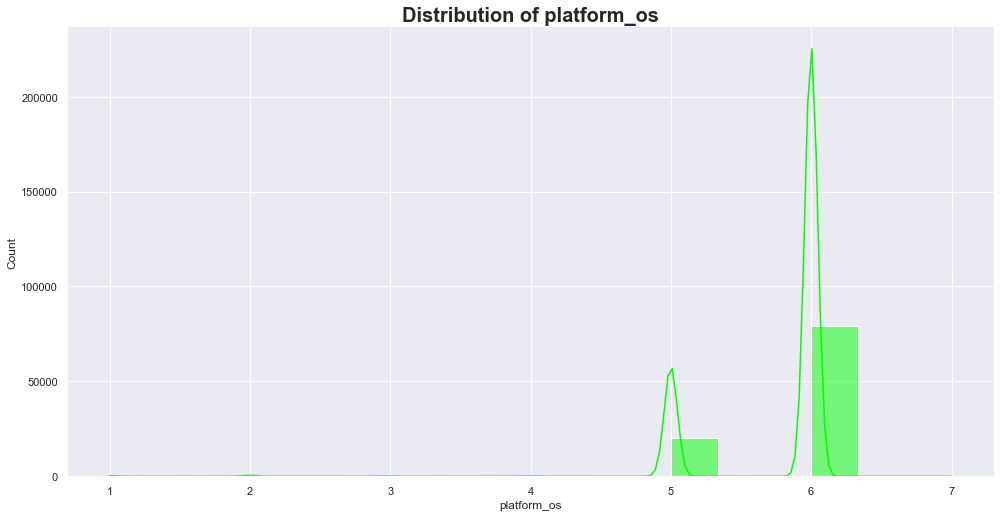

In [13]:
# histogram visual
# exploration = exploration()
fig = exploration.plot_hist(df,'platform_os','lime')

### ----> Platform 6 is most widely used version on the ad reaction (latest-alpha release)

## type

In [34]:
# grouping by experiment and its count
experiment_groups = df.groupby(['type']).agg({'type': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,type,count
0,impression,85744
1,first_dropped,10065
2,click-through-event,4137


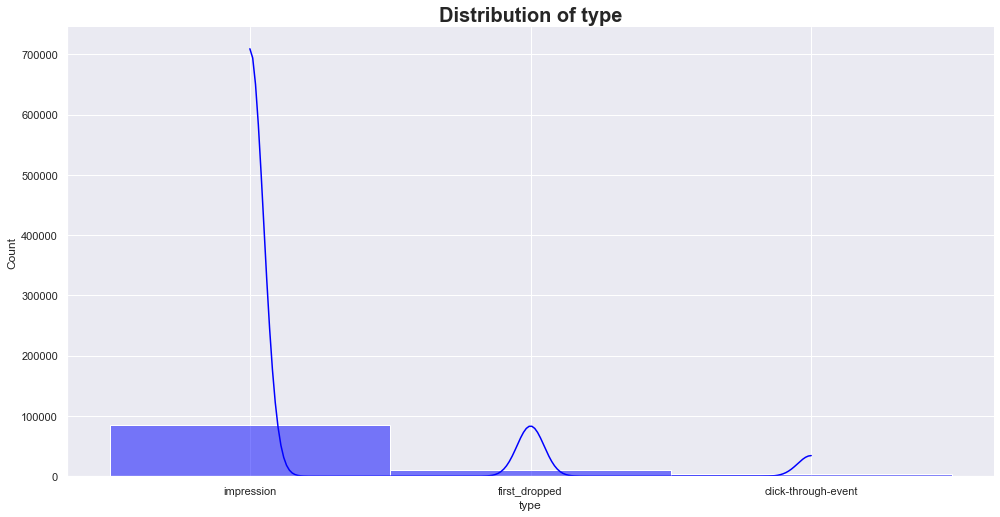

In [35]:
# histogram visual
fig = exploration.plot_hist(df,'type','blue')

### ----> The majority of the advertisements that were produced were recorded for audience impressions.

## currency

In [17]:
# grouping by experiment and its count
experiment_groups = df.groupby(['currency']).agg({'currency': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,currency,count
0,USD,64823
1,SGD,21957
2,GBP,8627
3,TWD,3922
4,HKD,255


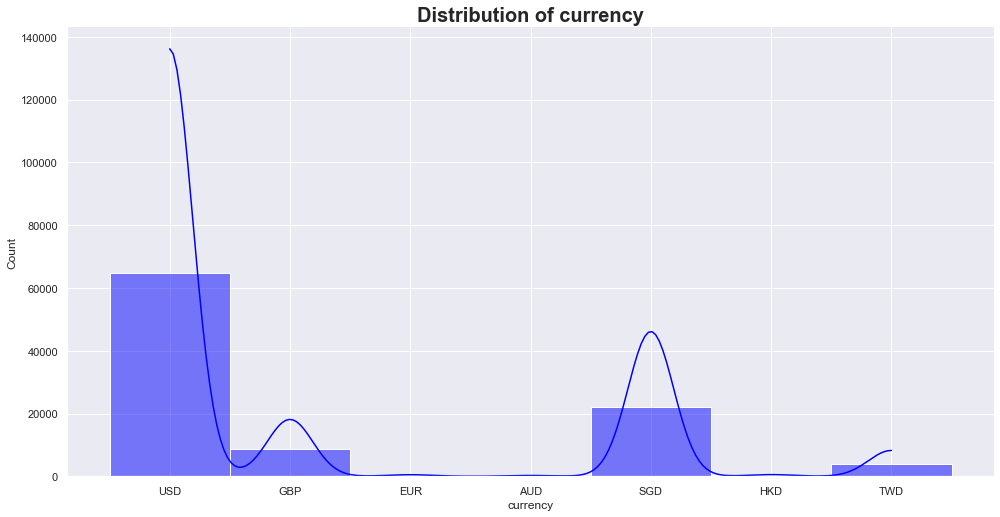

In [18]:
# histogram visual
fig = exploration.plot_hist(df,'currency','blue')

### ----> currency for the ad campaign conducted using mainly USD

## Directions

In [29]:
# grouping by experiment and its count
experiment_groups = df.groupby(['direction']).agg({'direction': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,direction,count
0,up,49939
1,no direction,14
2,right,12


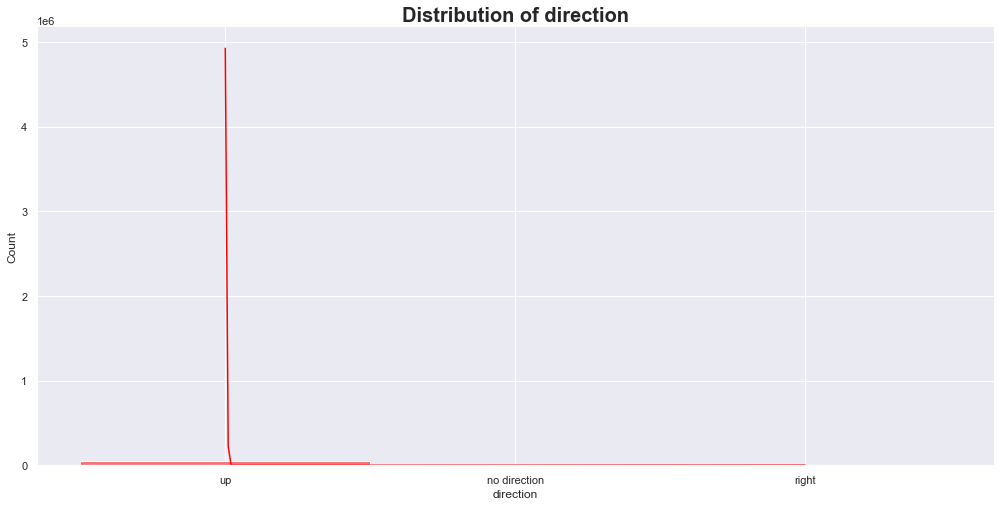

In [30]:
# histogram visual
fig = exploration.plot_hist(df,'direction','red')

## Browser

In [31]:
# grouping by experiment and its count
experiment_groups = df.groupby(['browser']).agg({'browser': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,browser,count
0,Chrome Mobile,21337
1,Mobile Safari,7270
2,Facebook,5819
3,Mobile Safari UI/WKWebView,4150
4,Chrome Mobile WebView,2978


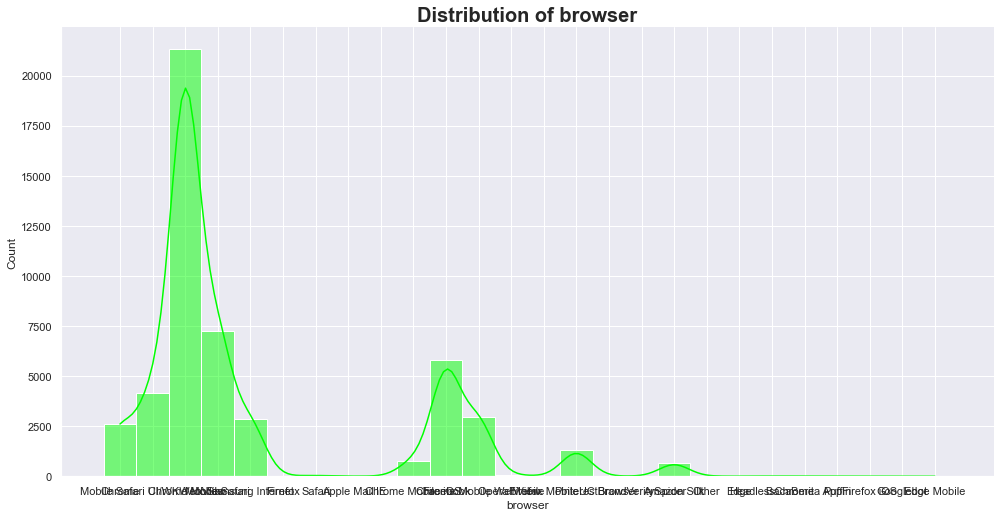

In [32]:
# histogram visual
fig = exploration.plot_hist(df,'browser','lime')

### ----> Chrome Mobile browser is most widely used when accessing the Ad

## Device Type

In [33]:
# grouping by experiment and its count
experiment_groups = df.groupby(['device_type']).agg({'device_type': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,device_type,count
0,Mobile,46088
1,Tablet,3666
2,PC,210
3,Other,1


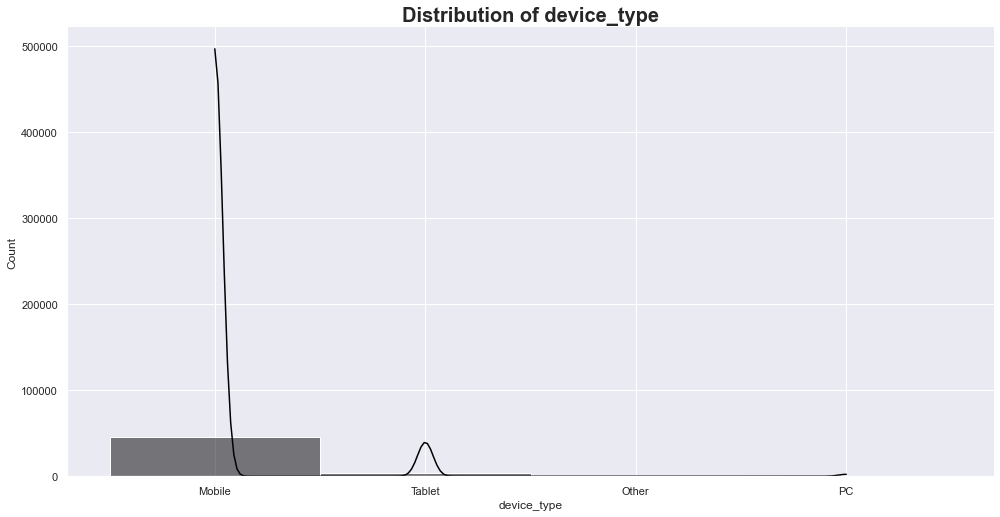

In [34]:
# histogram visual
fig = exploration.plot_hist(df,'device_type','black')

### ----> Generic smartphone takes the huge role at the Ad reaction platform

## geo_country

In [19]:
# grouping by experiment and its count
experiment_groups = df.groupby(['geo_country']).agg({'geo_country': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,geo_country,count
0,United States,71669
1,Singapore,19320
2,Taiwan,3922
3,Australia,3656
4,Hong Kong,512


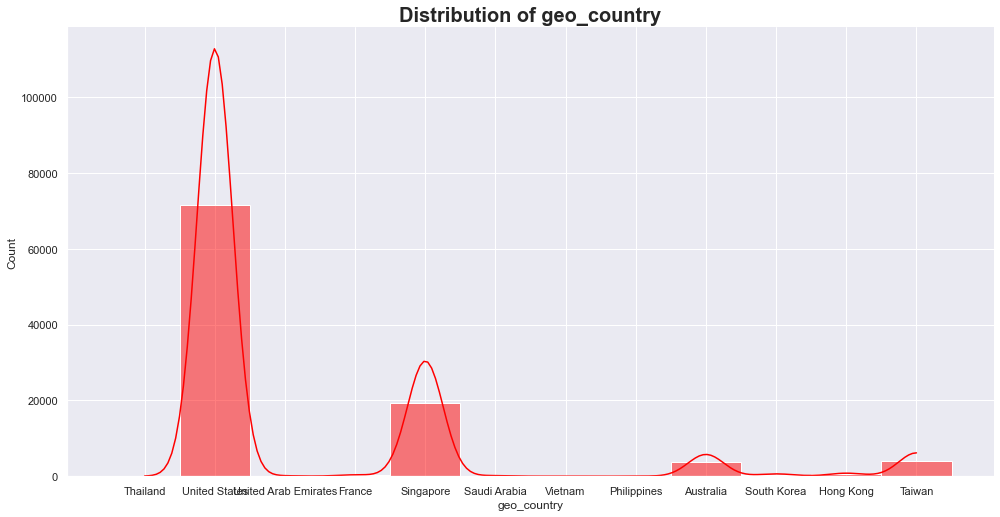

In [20]:
# histogram visual
fig = exploration.plot_hist(df,'geo_country','red')

### ----> The ad were shown/accessed mostly for countries like United States and Singapore

## Serving Location(s)

In [41]:
# grouping by experiment and its count
experiment_groups = df.groupby(['Serving Location(s)']).agg({'Serving Location(s)': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,Serving Location(s),count
0,US National,24599
1,Singapore,10600
2,"NY, Boston, Philadelphia",8010
3,US,5386
4,Korea,397


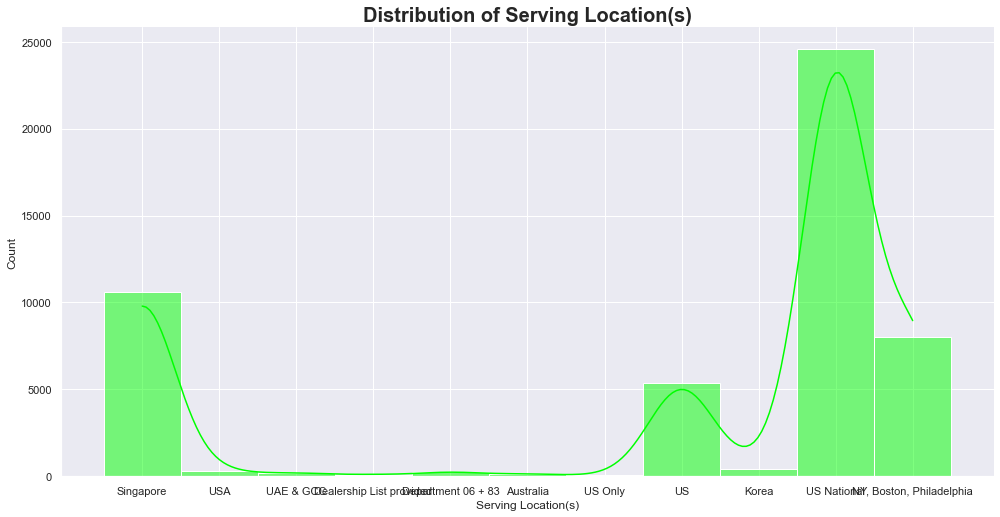

In [43]:
# histogram visual
fig = exploration.plot_hist(df,'Serving Location(s)','lime')

### ----> The ad campagin served for locations US National and Singapore

## Black/white/audience list included?

In [25]:
# grouping by experiment and its count
experiment_groups = df.groupby(['Black/white/audience list included?']).agg({'Black/white/audience list included?': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,Black/white/audience list included?,count
0,No black/white/audience list for this campaign,56265
1,Black/white/audience list will be provided later,26984
2,Black/white/audience list included,16697


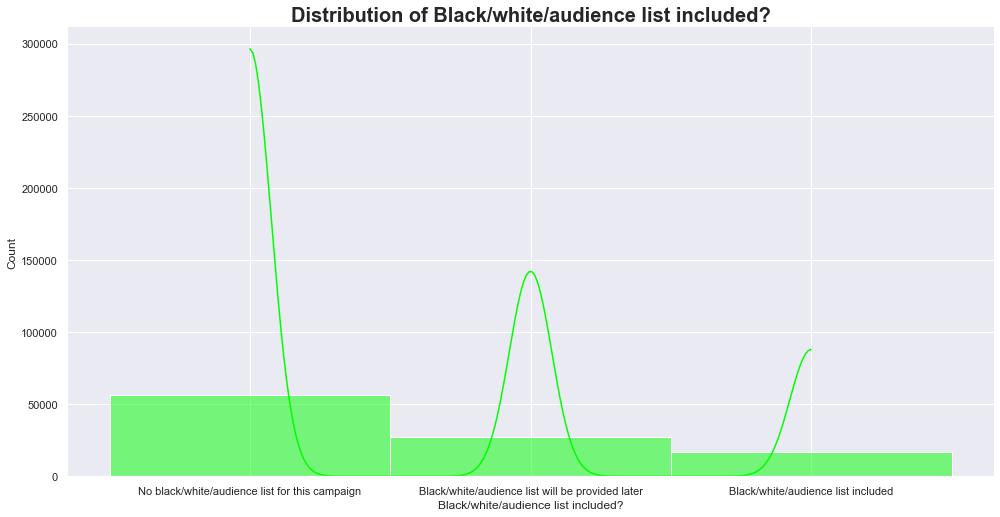

In [26]:
# histogram visual
fig = exploration.plot_hist(df,'Black/white/audience list included?','lime')

### ----> No black, white, or audience was identified or specifically targeted for this campaign.

## site_name

In [21]:
# grouping by experiment and its count
experiment_groups = df.groupby(['site_name']).agg({'site_name': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,site_name,count
0,www.foxnews.com,4720
1,www.whowhatwear.com,3909
2,www.scmp.com,2505
3,fortnitetracker.com,2122
4,www.yahoo.com,1455


### ----> Most of the traffic for the advertisement came from the website 'www.foxnews.com' and 'www.whowhatwear.com'

## Gross Cost/Budget

In [50]:
# grouping by experiment and its count
experiment_groups = df.groupby(['Gross Cost/Budget']).agg({'Gross Cost/Budget': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,Gross Cost/Budget,count
0,50000.00,15120
1,212471.60,8010
2,25411.68,7436
3,0.00,6821
4,75000.00,4287


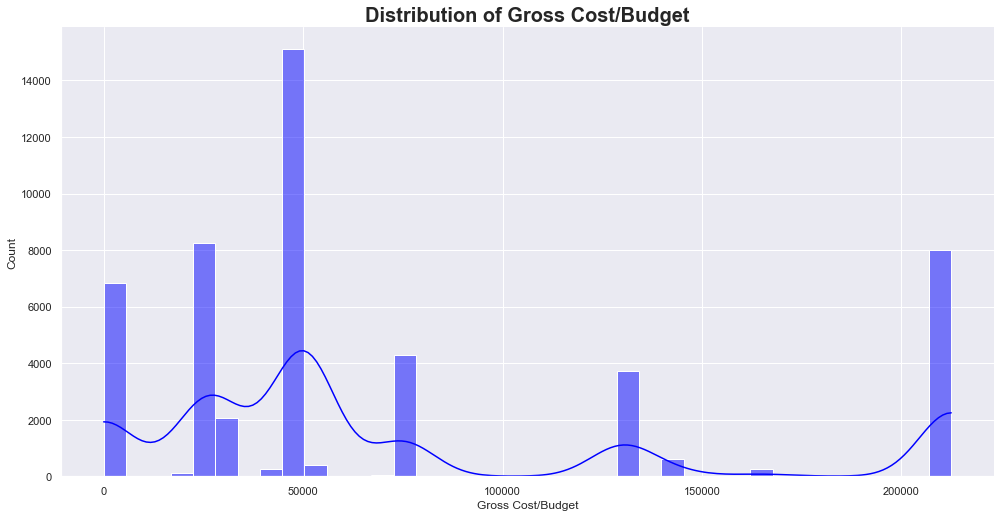

In [51]:
# histogram visual
fig = exploration.plot_hist(df,'Gross Cost/Budget','blue')

### ----> The majority of the campaign add's gross budget was 50000 USD

## startdate

In [27]:
# grouping by experiment and its count
experiment_groups = df.groupby(['startdate']).agg({'startdate': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,startdate,count
0,2020-03-01,17755
1,2021-04-30,17345
2,2020-10-12,13764
3,2021-01-11,10897
4,2021-01-08,9998


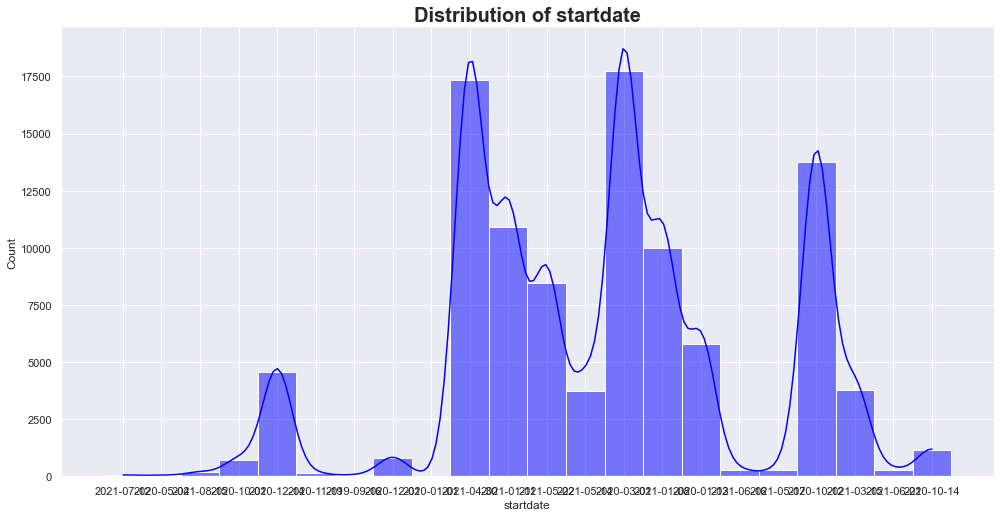

In [28]:
# histogram visual
fig = exploration.plot_hist(df,'startdate','blue')

### ----> The majority of the campaign's start date is March 1, 2020.

# enddate

In [29]:
# grouping by experiment and its count
experiment_groups = df.groupby(['enddate']).agg({'enddate': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,enddate,count
0,2020-11-30,17755
1,2021-05-16,17345
2,2020-12-31,15632
3,2021-01-31,10897
4,2021-02-18,9998


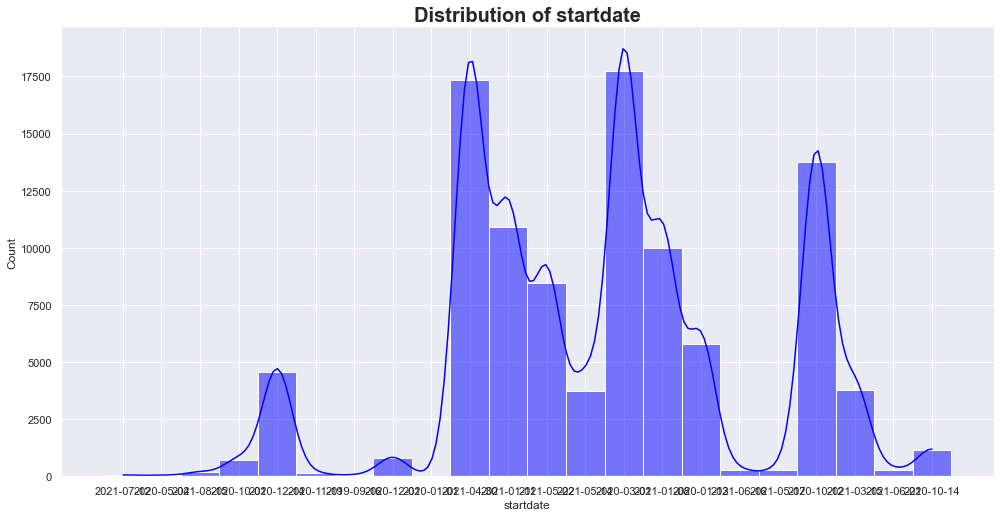

In [30]:
# histogram visual
fig = exploration.plot_hist(df,'startdate','blue')

### ——> The majority of the campaign end on November 30, 2020.

## Placement(s)

In [32]:
# grouping by experiment and its count
experiment_groups = df.groupby(['Placement(s)']).agg({'Placement(s)': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,Placement(s),count
0,320x480 (Fullscreen mobile / interstitial),75582
1,320x480 (Fullscreen mobile / interstitial)\n30...,24314
2,320x480 (Fullscreen mobile / interstitial)\n30...,50


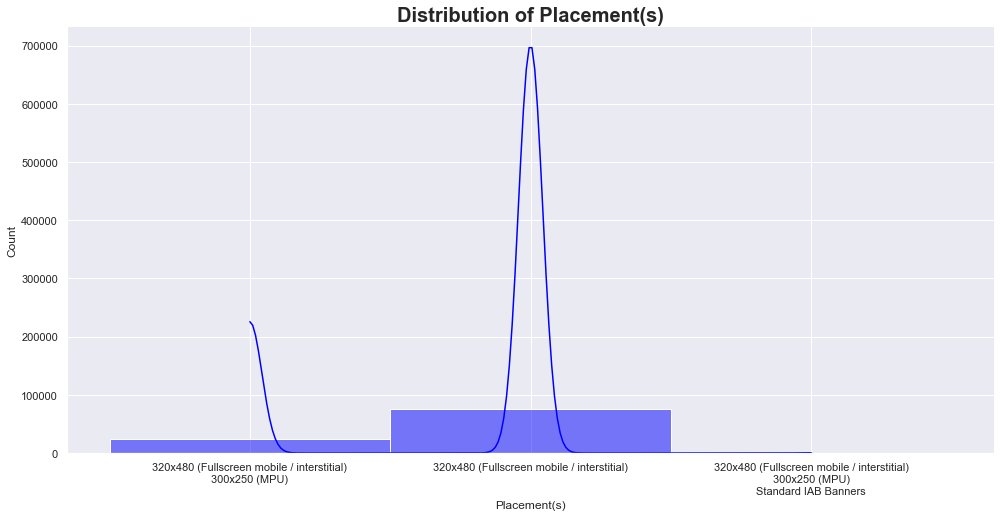

In [33]:
# histogram visual
fig = exploration.plot_hist(df,'Placement(s)','blue') 

#### ----> The 320×480 ad unit is a mobile ad with dimensions of 320 pixels wide by 480 pixels tall. This ad size is intended to be a full-screen ad on smartphones. Interstitial technically means an ad that appears between two pages. This means that when you click a link instead of the next page loading, this ad loads. 

## browser_ts

In [36]:
# grouping by experiment and its count
experiment_groups = df.groupby(['browser_ts']).agg({'browser_ts': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,browser_ts,count
0,2021-01-06 10:15:31.871,4
1,2021-01-27 01:20:09.263,2
2,2021-01-22 14:24:32.472,2
3,2021-05-12 19:29:24.123,2
4,2021-02-10 21:03:46.967,2


In [ ]:
# histogram visual
fig = exploration.plot_hist(df,'browser_ts','blue') 

# Correlations

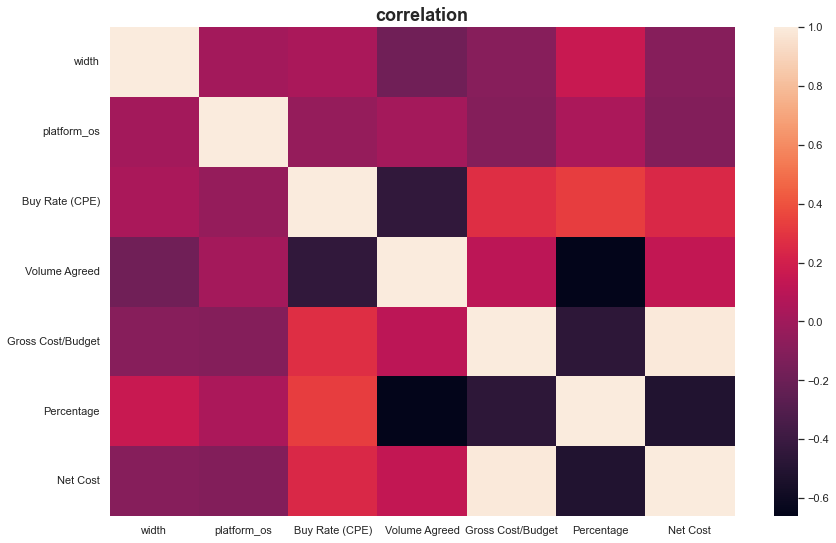

In [9]:
# correlation
exploration = exploration()
exploration.plot_heatmap_from_correlation(df.corr(), "correlation")